In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
file=files.upload()

Saving CWC23_all_innings.csv to CWC23_all_innings.csv


In [ ]:
df=pd.read_csv('CWC23_all_innings.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [ ]:
df.head(3)

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.75,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.75,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.80,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

In [ ]:
df['wkts'].fillna(0, inplace=True)
df['overs'].fillna(0, inplace=True)
df['mdns'].fillna(0, inplace=True)
df['econ'].fillna(0, inplace=True)
df['4s'].fillna(0, inplace=True)
df['6s'].fillna(0, inplace=True)
df['sr'].fillna(0, inplace=True)
df['not_out'].fillna(0, inplace=True)
df['mins'].fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

team               0
player             0
bat_or_bowl        0
bb_bf              0
runs               0
wkts               0
wicketball_prob    0
runs_per_ball      0
opposition         0
ground             0
start_date         0
overs              0
mdns               0
econ               0
inns               0
4s                 0
6s                 0
sr                 0
not_out            0
mins               0
dtype: int64

In [ ]:
df.describe()

,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
count,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000
mean,35.305398,33.237216,0.480824,0.070574,0.898755,2.930753,0.102273,2.373587,1.470881,1.565341,0.451705,50.301307,0.090909,25.669034
std,25.248709,28.056329,0.959552,0.152535,0.471051,3.975200,0.358938,3.211795,0.499329,2.752525,1.222484,57.756354,0.287582,38.421167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.750000,11.000000,0.000000,0.010724,0.621350,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,29.000000,0.000000,0.032258,0.879005,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,38.670000,0.000000,8.000000
75%,54.000000,49.000000,1.000000,0.062500,1.130819,7.000000,0.000000,5.125000,2.000000,2.000000,0.000000,89.120000,0.000000,36.000000
max,143.000000,201.000000,7.000000,1.000000,6.000000,10.000000,3.000000,16.000000,2.000000,21.000000,11.000000,600.000000,1.000000,217.000000


1. Team Performance Analysis:

In [ ]:
team_performance = df.groupby('team').agg({'runs': 'sum','wkts': 'sum','runs_per_ball': 'mean','econ': 'mean'}).reset_index()
team_performance

,team,runs,wkts,runs_per_ball,econ
0,AFG,4134,53.0,0.855123,2.457442
1,AUS,5234,77.0,0.890978,2.264452
2,BAN,4358,51.0,0.840755,2.248085
3,ENG,4396,65.0,0.935399,2.129934
4,IND,4783,94.0,0.920735,2.321774
5,NED,4268,63.0,0.809495,2.318790
6,NZ,5376,71.0,1.000762,2.728750
7,PAK,4786,65.0,0.933415,2.554063
8,SA,5097,88.0,0.970307,2.176383
9,SL,4366,50.0,0.837546,2.585000


In [ ]:
top_teams_runs = team_performance.sort_values(by='runs', ascending=False).head(5)
top_teams_runs

,team,runs,wkts,runs_per_ball,econ
6,NZ,5376,71.0,1.000762,2.728750
1,AUS,5234,77.0,0.890978,2.264452
8,SA,5097,88.0,0.970307,2.176383
7,PAK,4786,65.0,0.933415,2.554063
4,IND,4783,94.0,0.920735,2.321774


<ipython-input-29-87b4d3fd5c8d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runs', y='team', data=top_teams_runs, palette='viridis')


Text(0.5, 0, 'Total Runs')

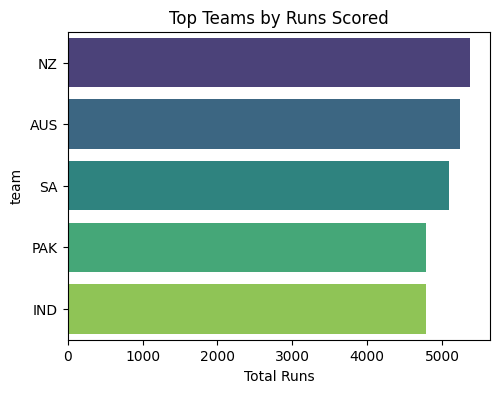

In [ ]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='runs', y='team', data=top_teams_runs, palette='viridis')
plt.title('Top Teams by Runs Scored')
plt.xlabel('Total Runs')

In [ ]:
top_teams_wkts = team_performance.sort_values(by='wkts', ascending=False).head(5)
top_teams_wkts

,team,runs,wkts,runs_per_ball,econ
4,IND,4783,94.0,0.920735,2.321774
8,SA,5097,88.0,0.970307,2.176383
1,AUS,5234,77.0,0.890978,2.264452
6,NZ,5376,71.0,1.000762,2.728750
3,ENG,4396,65.0,0.935399,2.129934


<ipython-input-31-d7969fa52b15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wkts', y='team', data=top_teams_wkts, palette='magma')


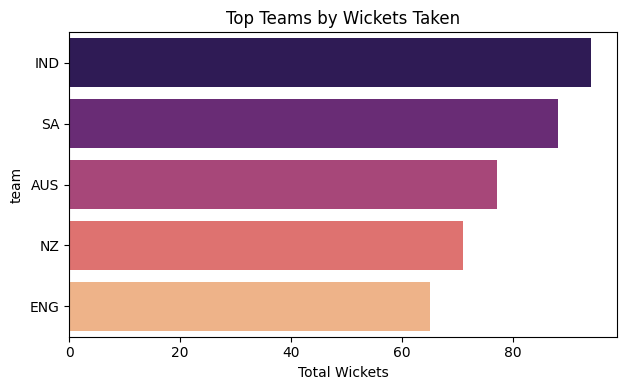

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 2)
sns.barplot(x='wkts', y='team', data=top_teams_wkts, palette='magma')
plt.title('Top Teams by Wickets Taken')
plt.xlabel('Total Wickets')
plt.tight_layout()
plt.show()

2. Player Performance Analysis:

In [ ]:
player_performance = df.groupby(['team', 'player', 'bat_or_bowl']).agg({'runs': 'sum','wkts': 'sum','bb_bf': 'sum','overs': 'sum'}).reset_index()
player_performance

,team,player,bat_or_bowl,runs,wkts,bb_bf,overs
0,AFG,Azmatullah Omarzai (AFG),bat,353,0.0,361,0.0
1,AFG,Azmatullah Omarzai (AFG),bowl,270,7.0,228,38.0
2,AFG,Fazalhaq Farooqi (AFG),bat,2,0.0,6,0.0
3,AFG,Fazalhaq Farooqi (AFG),bowl,228,6.0,240,40.0
4,AFG,Hashmatullah Shahidi (AFG),bat,310,0.0,424,0.0
...,...,...,...,...,...,...,...
244,SL,MDKJ Perera (SL),bat,149,0.0,147,0.0
245,SL,P Nissanka (SL),bat,332,0.0,371,0.0
246,SL,PVD Chameera (SL),bat,6,0.0,39,0.0
247,SL,PVD Chameera (SL),bowl,196,2.0,188,31.2


In [ ]:
leading_run_scorers = player_performance[player_performance['bat_or_bowl'] == 'bat'].nlargest(5, 'runs')
leading_run_scorers

,team,player,bat_or_bowl,runs,wkts,bb_bf,overs
119,IND,V Kohli (IND),bat,711,0.0,784,0.0
213,SA,Q de Kock (SA),bat,594,0.0,555,0.0
163,NZ,R Ravindra (NZ),bat,578,0.0,543,0.0
147,NZ,DJ Mitchell (NZ),bat,552,0.0,497,0.0
110,IND,RG Sharma (IND),bat,550,0.0,443,0.0


Text(0.5, 0, 'Total Runs')

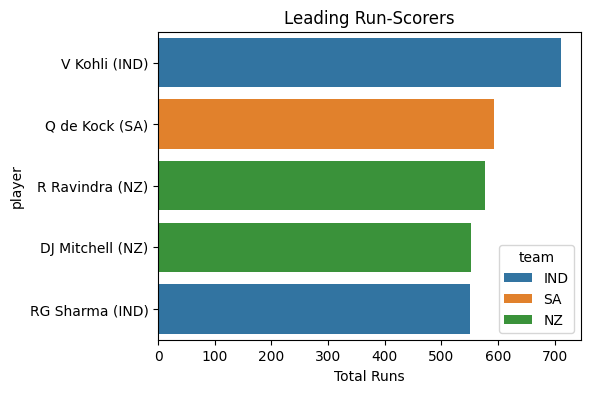

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='runs', y='player', data=leading_run_scorers, hue='team', dodge=False)
plt.title('Leading Run-Scorers')
plt.xlabel('Total Runs')

In [ ]:
player_impact = player_performance[player_performance['bat_or_bowl'] == 'bat'].groupby('player')['runs'].sum().reset_index()
player_impact = player_impact.sort_values(by='runs', ascending=False).head(10)
player_impact

,player,runs
142,V Kohli (IND),711
104,Q de Kock (SA),594
106,R Ravindra (NZ),578
26,DJ Mitchell (NZ),552
109,RG Sharma (IND),550
24,DA Warner (AUS),528
122,SS Iyer (IND),526
39,HE van der Dussen (SA),448
82,MR Marsh (AUS),426
4,AK Markram (SA),406


In [ ]:
leading_wicket_takers = player_performance[player_performance['bat_or_bowl'] == 'bowl'].nlargest(5, 'wkts')
leading_wicket_takers

,team,player,bat_or_bowl,runs,wkts,bb_bf,overs
105,IND,Mohammed Shami (IND),bowl,210,23.0,251,41.5
22,AUS,A Zampa (AUS),bowl,471,22.0,516,86.0
228,SL,D Madushanka (SL),bowl,525,21.0,470,77.8
201,SA,G Coetzee (SA),bowl,396,20.0,381,63.3
100,IND,JJ Bumrah (IND),bowl,330,18.0,497,82.5


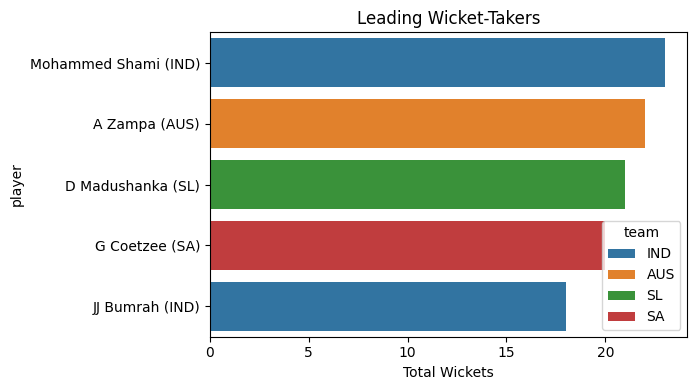

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 2)
sns.barplot(x='wkts', y='player', data=leading_wicket_takers, hue='team', dodge=False)
plt.title('Leading Wicket-Takers')
plt.xlabel('Total Wickets')
plt.tight_layout()
plt.show()

3. Opposition and Ground Analysis:

In [ ]:
team_opposition_performance = df.groupby(['team', 'opposition']).agg({'runs': 'sum','wkts': 'sum'}).reset_index()
team_opposition_performance

,team,opposition,runs,wkts
0,AFG,v Australia,563,6.0
1,AFG,v Bangladesh,303,3.0
2,AFG,v England,480,10.0
3,AFG,v India,525,2.0
4,AFG,v Netherlands,346,6.0
...,...,...,...,...
86,SL,v India,391,6.0
87,SL,v Netherlands,495,9.0
88,SL,v New Zealand,339,4.0
89,SL,v Pakistan,675,4.0


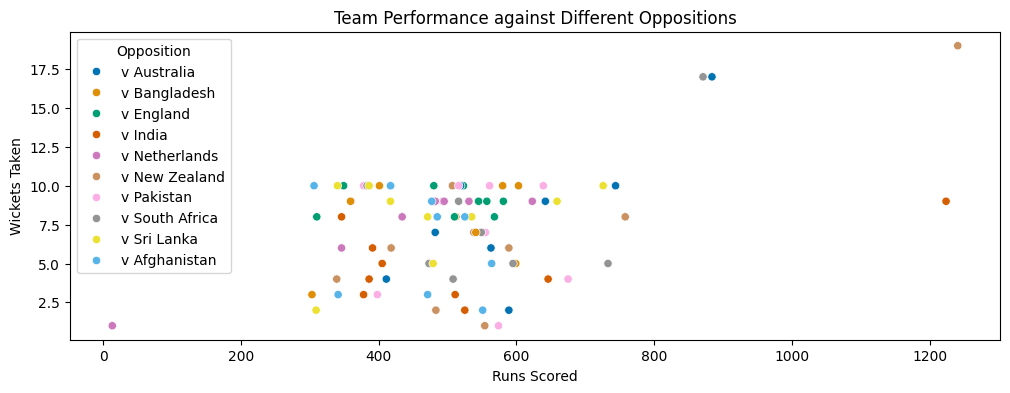

In [ ]:
plt.figure(figsize=(12, 4))
sns.scatterplot(x='runs', y='wkts', data=team_opposition_performance, hue='opposition', palette='colorblind')
plt.title('Team Performance against Different Oppositions')
plt.xlabel('Runs Scored')
plt.ylabel('Wickets Taken')
plt.legend(title='Opposition')
plt.show()

In [ ]:
ground_performance = df.groupby('ground').agg({'runs': 'sum','wkts': 'sum'}).reset_index()
ground_performance

,ground,runs,wkts
0,Ahmedabad,3859,57.0
1,Bengaluru,5024,64.0
2,Chennai,4709,69.0
3,Delhi,5509,74.0
4,Dharamsala,5189,82.0
5,Eden Gardens,4254,81.0
6,Hyderabad,3367,47.0
7,Lucknow,4120,71.0
8,Pune,5171,60.0
9,Wankhede,5596,72.0


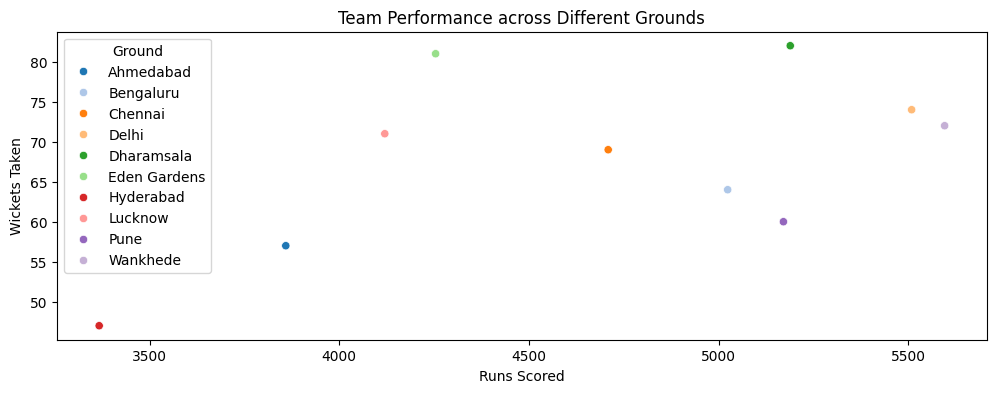

In [ ]:
plt.figure(figsize=(12, 4))
sns.scatterplot(x='runs', y='wkts', data=ground_performance, hue='ground', palette='tab20')
plt.title('Team Performance across Different Grounds')
plt.xlabel('Runs Scored')
plt.ylabel('Wickets Taken')
plt.legend(title='Ground')
plt.show()

4. Temporal Analysis:

In [ ]:
df['start_date'] = pd.to_datetime(df['start_date'])

In [ ]:
temporal_performance = df.groupby('start_date').agg({'runs': 'sum','wkts': 'sum'}).reset_index()
temporal_performance.head()

,start_date,runs,wkts
0,2023-10-05,1111,10.0
1,2023-10-06,964,18.0
2,2023-10-07,2068,28.0
3,2023-10-08,772,14.0
4,2023-10-09,1069,16.0


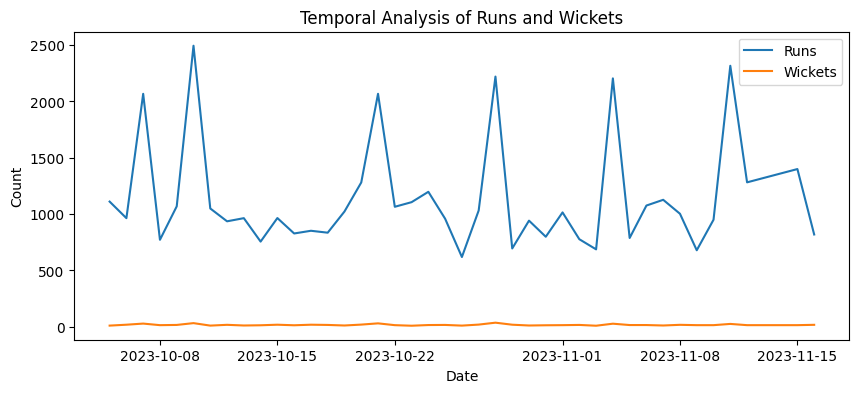

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(temporal_performance['start_date'], temporal_performance['runs'], label='Runs')
plt.plot(temporal_performance['start_date'], temporal_performance['wkts'], label='Wickets')
plt.title('Temporal Analysis of Runs and Wickets')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

#Conclusion:

The successful completion of this exploratory data analysis has provided valuable insights into the World Cup 2023, enabling a deeper understanding of team and player dynamics. By presenting findings in a clear and concise manner, this project showcases analytical skills and the ability to draw meaningful conclusions from the dataset. Moving forward, these insights serve as a foundation for further analysis and decision-making in the cricketing community, contributing to a richer understanding of cricket statistics and performance metrics in competitive sporting contexts.